# Â§ßÁ∫≤
# 1„ÄÅÊï∞ÊçÆÁà¨Âèñ
# 2„ÄÅËØç‰∫ëÂ±ïÁ§∫
# 3„ÄÅÂéüÂõ†ÂàÜÊûê
# 4„ÄÅËß£ÂÜ≥ÊñπÊ°à

## 1„ÄÅÊï∞ÊçÆÁà¨Âèñ

In [1]:
# -*- coding: utf-8 -*-
import requests
import time
import json
import re

from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np

import jieba
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def weibo_comment():
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36",
        "cookie":"XXXXXXXXXX  YOUR COOKIE"
    }
    max_id = ""
    datalist = []
    while True:
        if max_id == "":
            url = "https://m.weibo.cn/comments/hotflow?id=4677380206235606&mid=4677380206235606&max_id_type=0"
        else:
            url = "https://m.weibo.cn/comments/hotflow?id=4677380206235606&mid=4677380206235606&max_id="+str(max_id)+"&max_id_type=0"                                                                                          
#         print(url)
        
        response = requests.get(url, headers=headers)
#         print(response)
        js = response.json()
    
        if js['ok'] == 0:
            break
    
        max_id = js["data"]["max_id"]
#         print(max_id) 
        
        for i in js['data']['data']:
            comment_list = []
            comment_user = i['user']['screen_name']
            comment_list.append(comment_user)   #ËØÑËÆ∫‰∫∫
            
            comment_user_gender = i['user']['gender']
            comment_list.append(comment_user_gender)    #ÊÄßÂà´
            
            comment_text = i['text']
            p = re.compile(r'(<span.*>.*</span>)*(<a.*>.*</a>)?')
            comment_text = p.sub(r'', comment_text)
            comment_list.append(comment_text)     #ËØÑËÆ∫ÂÜÖÂÆπ
            
#             comment_time = i['created_at'] 
#             comment_list.append(comment_time)   #ËØÑËÆ∫Êó∂Èó¥
            
            comment_floor = i['floor_number'] 
            comment_list.append(comment_floor)  #ÂõûÂ§çÊï∞
            
            
            datalist.append(comment_list)
            
        time.sleep(3)
            
    return datalist

In [3]:
comment = weibo_comment()
data=DataFrame(comment)

In [4]:
data.columns = ['commenter','gender','text','floor']
data.head()

commenter gender                                               text  floor
0   MissXÂÖîÂÖî      m                           ‰∫∫ÂÆ∂‰πü‰∏çËØ¥‰∏çË¶ÅÂ•≥ÁöÑÂëÄ„ÄÇÂ∞±ËØ¥‰Ω†‰∏çÁ¨¶ÂêàÊù°‰ª∂Ôºå‰Ω†ÊÄé‰πàÂäû      5
1      ÊØèÊó•ÁæéÂ•Ω      f                    ÊÑüËßâÊå∫ÈöæÁöÑ‚Ä¶Áé∞Âú®ÂæàÂ§ö‰ºÅ‰∏öÂ∞±ÊòØ‰∏çÊòéËØ¥Ôºå‰ΩÜÂ∞±‰ºöÁî®ÂêÑÁßçÁêÜÁî±ÊääÂ•≥ÁöÑÂà∑Êéâ     17
2   cpÁ£ïÂà∞Â§¥Êé∞Êéâ      f  „ÄÇ„ÄÇËøôÂæàÈöæÔºåÈô§ÈùûÊúâÊîøÁ≠ñÔºåË¶ÅÊ±Ç‰ºÅ‰∏öÂ•≥ÂëòÂ∑•ÊØî‰æãÂ§öÂ∞ëÔºåÊàñËÄÖÂ•≥ÂëòÂ∑•Â§öÊúâ‰∏ÄÂÆöÁ®éÂä°ÊîøÁ≠ñ‰ºòÊÉ†„ÄÇ„ÄÇÊâçËÉΩÁúüÁöÑ‰øù...      7
3     ÁùπÂ∞îÂøÜÊô¥Ê±ü      m                                 ÂèØ‰ª•Áî∑Â•≥Âêå‰øÆ‰∫ßÂÅáÂêóÔºüËÉΩËß£ÂÜ≥ÂæàÂ§öÊ≠ßËßÜ‰∫Ü    119
4      Âè∏È©¨ËíÇËçß      f  ‰∏âËÉéÊîøÁ≠ñ‰∏ÄÂá∫ÔºåÊúâÂá†‰∏™‰ºÅ‰∏ö‰ºöÊòéËØ¥‰∏çË¶ÅÂ•≥ÊÄßÔºü‚ÄúÊñπ‰æøÈóÆÊÇ®Áé∞Âú®ÁöÑÂ©öÂßªÊÉÖÂÜµÂêóÔºü‚Äù‚ÄúÂõ†‰∏∫ËøòÊúâÂÖ∂‰ªñÂÄôÈÄâ‰∫∫ÈúÄ...     31

In [5]:
data.to_csv('./data.csv',index=False,header=True)    #Êï∞ÊçÆ‰øùÂ≠òÔºà‰∏çË¶ÅindexÔºå‰øùÂ≠òheaderÔºâ

In [5]:
data

commenter gender                                               text  floor
0     MissXÂÖîÂÖî      m                           ‰∫∫ÂÆ∂‰πü‰∏çËØ¥‰∏çË¶ÅÂ•≥ÁöÑÂëÄ„ÄÇÂ∞±ËØ¥‰Ω†‰∏çÁ¨¶ÂêàÊù°‰ª∂Ôºå‰Ω†ÊÄé‰πàÂäû      5
1        ÊØèÊó•ÁæéÂ•Ω      f                    ÊÑüËßâÊå∫ÈöæÁöÑ‚Ä¶Áé∞Âú®ÂæàÂ§ö‰ºÅ‰∏öÂ∞±ÊòØ‰∏çÊòéËØ¥Ôºå‰ΩÜÂ∞±‰ºöÁî®ÂêÑÁßçÁêÜÁî±ÊääÂ•≥ÁöÑÂà∑Êéâ     17
2     cpÁ£ïÂà∞Â§¥Êé∞Êéâ      f  „ÄÇ„ÄÇËøôÂæàÈöæÔºåÈô§ÈùûÊúâÊîøÁ≠ñÔºåË¶ÅÊ±Ç‰ºÅ‰∏öÂ•≥ÂëòÂ∑•ÊØî‰æãÂ§öÂ∞ëÔºåÊàñËÄÖÂ•≥ÂëòÂ∑•Â§öÊúâ‰∏ÄÂÆöÁ®éÂä°ÊîøÁ≠ñ‰ºòÊÉ†„ÄÇ„ÄÇÊâçËÉΩÁúüÁöÑ‰øù...      7
3       ÁùπÂ∞îÂøÜÊô¥Ê±ü      m                                 ÂèØ‰ª•Áî∑Â•≥Âêå‰øÆ‰∫ßÂÅáÂêóÔºüËÉΩËß£ÂÜ≥ÂæàÂ§öÊ≠ßËßÜ‰∫Ü    119
4        Âè∏È©¨ËíÇËçß      f  ‰∏âËÉéÊîøÁ≠ñ‰∏ÄÂá∫ÔºåÊúâÂá†‰∏™‰ºÅ‰∏ö‰ºöÊòéËØ¥‰∏çË¶ÅÂ•≥ÊÄßÔºü‚ÄúÊñπ‰æøÈóÆÊÇ®Áé∞Âú®ÁöÑÂ©öÂßªÊÉÖÂÜµÂêóÔºü‚Äù‚ÄúÂõ†‰∏∫ËøòÊúâÂÖ∂‰ªñÂÄôÈÄâ‰∫∫ÈúÄ...     31
..        ...    ...                                                ...    ...
293   ÁéãË¥ùËØ≠ÁöÑÂòéÊãâÂìà      f                     Â∑•Âú∞ÂëÄÔºåÂá∫Â∑ÆÂëÄ‰ªÄ‰πàÁöÑ ÈÉΩÊêûËµ∑Êù•Ôºå‰ΩÜÂá°ËÉΩÂπ≤ÁÇπÊ≠£‰∫ãÂÑøÔºå.....   4064
294   È¶ôËïâ‰Ω†‰∏™‰∏çÊûóÊûó      m                                            Ëøô‰∏™ÂæàÈöæÁõëÁÆ°Âêß   4056
295    Ê§∞È¶ôÂïµÂèΩÂ•∂Á≥ï      f                               Ëá™‰ªé‰∏âËÉéÊîøÁ≠ñÂá∫Êù•‰πãÂêéÔºåÁúüÁöÑÂæàÊãÖÂøÉÂ∞±‰∏öÈóÆÈ¢ò   4022
296      Â§™Èò≥Ê≤°Áù°      f             Êç¢‰ΩçÊÄùËÄÉÔºåÂ¶ÇÊûúÊàë‰ª¨ÊòØËÄÅÊùø‰πüÊòØÊÄé‰πàÊ†∑ËÆ©ÂÖ¨Âè∏ÁõàÂà©ÔºåÊâÄ‰ª•Â∞±ÈúÄË¶ÅÂõΩÂÆ∂ÁöÑÈºìÂä±ÊîØÊåÅÊîøÁ≠ñ‰∫Ü   4018
297      Ë•øÊôÆÂÆù-      f  Èù¢ÂØπ25-30Â≤ÅÁöÑÈùíÂπ¥Â•≥ÊÄßÔºåÈù¢ËØïÂÆòÁÖßÊ†∑‰ºöÈóÆ‰Ω†ÁªìÊ≤°ÁªìÂ©öÔºåÊúâÊ≤°ÊúâÁî∑ÂèãÔºåÁªì‰∫ÜÂ©ö‰πü‰ºöÈóÆ‰Ω†ÊúâÊ≤°ÊúâÂ∞èÂ≠©Ôºå...   8066

[298 rows x 4 columns]

## 2„ÄÅÁªòÂà∂ËØç‰∫ëÂõæ

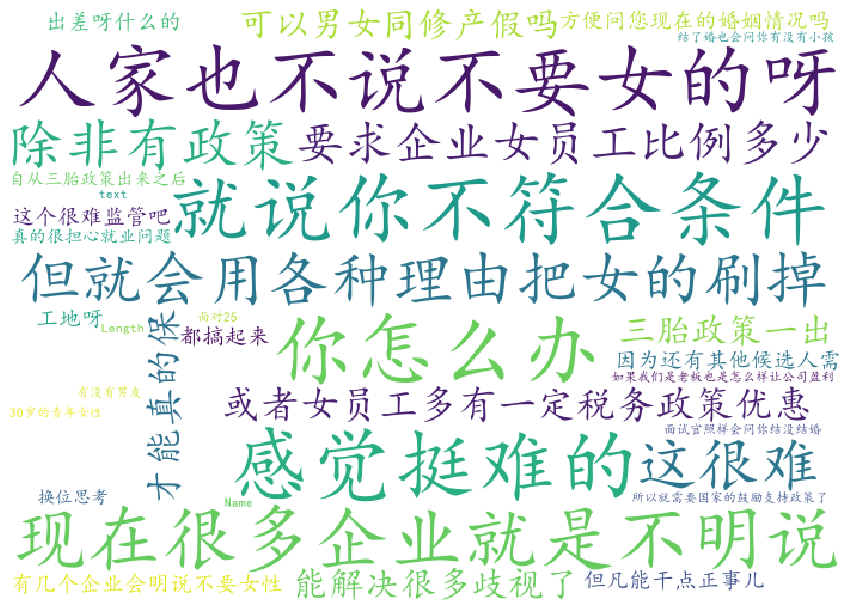

In [6]:
wordcloud=WordCloud(font_path="C:/Windows/Fonts/simkai.ttf",background_color='white',width=700,height=500,max_words=50).generate(str(data['text'])[:645])
plt.figure(figsize=[15,12])
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("1all_comment(‰∏çÂàÜËØç).jpg")
plt.show()

In [7]:
comment = data['text'].dropna(how='any') #ÂéªÊéâÁ©∫ÂÄº
all_comment = ''.join(i for i in comment) #ÊääÊâÄÊúâÂ≠óÁ¨¶‰∏≤ËøûÊé•Êàê‰∏Ä‰∏™ÈïøÊñáÊú¨
comment_new = re.sub(re.compile('Ôºå|Ôºõ|\.|„ÄÅ|„ÄÇ'),'',all_comment) #ÂéªÊéâÈÄóÂè∑Á≠âÁ¨¶Âè∑
comment_new

'‰∫∫ÂÆ∂‰πü‰∏çËØ¥‰∏çË¶ÅÂ•≥ÁöÑÂëÄÂ∞±ËØ¥‰Ω†‰∏çÁ¨¶ÂêàÊù°‰ª∂‰Ω†ÊÄé‰πàÂäûÊÑüËßâÊå∫ÈöæÁöÑ‚Ä¶Áé∞Âú®ÂæàÂ§ö‰ºÅ‰∏öÂ∞±ÊòØ‰∏çÊòéËØ¥‰ΩÜÂ∞±‰ºöÁî®ÂêÑÁßçÁêÜÁî±ÊääÂ•≥ÁöÑÂà∑ÊéâËøôÂæàÈöæÈô§ÈùûÊúâÊîøÁ≠ñË¶ÅÊ±Ç‰ºÅ‰∏öÂ•≥ÂëòÂ∑•ÊØî‰æãÂ§öÂ∞ëÊàñËÄÖÂ•≥ÂëòÂ∑•Â§öÊúâ‰∏ÄÂÆöÁ®éÂä°ÊîøÁ≠ñ‰ºòÊÉ†ÊâçËÉΩÁúüÁöÑ‰øùÊä§Â•≥ÊÄßÂ∞±‰∏öÂèØ‰ª•Áî∑Â•≥Âêå‰øÆ‰∫ßÂÅáÂêóÔºüËÉΩËß£ÂÜ≥ÂæàÂ§öÊ≠ßËßÜ‰∫Ü‰∏âËÉéÊîøÁ≠ñ‰∏ÄÂá∫ÊúâÂá†‰∏™‰ºÅ‰∏ö‰ºöÊòéËØ¥‰∏çË¶ÅÂ•≥ÊÄßÔºü‚ÄúÊñπ‰æøÈóÆÊÇ®Áé∞Âú®ÁöÑÂ©öÂßªÊÉÖÂÜµÂêóÔºü‚Äù‚ÄúÂõ†‰∏∫ËøòÊúâÂÖ∂‰ªñÂÄôÈÄâ‰∫∫ÈúÄË¶Å‰∏Ä‰∏ÄÈù¢ËØïÊâÄ‰ª•ÊúâÊ∂àÊÅØÊàë‰ª¨ÂêéÁª≠‰ºöËÅîÁ≥ªÊÇ®‚ÄùÂæàÂ§öÈÉΩÊòØÈöêÊÄßÊÄßÂà´Ê≠ßËßÜÂ•≥ÊÄßÂæàÂ§öÈÉΩÊòØÈöêÂΩ¢ÊÄßÂà´Ê≠ßËßÜÊàë‰ª¨ÂéªÂ∫îËÅòÈÉΩË¶ÅÈóÆÊÅãÁà±ÊÉÖÂÜµÂíåÂáÜÂ§á‰ªÄ‰πàÊó∂ÂÄôÁªìÂ©öË¶ÅÂ≠©Â≠êÁî∑Áîü‰∏ç‰ºöÈóÆÈïøËÉñ‰∫ÜËøòË¶ÅÂçïÁã¨Êâæ‰Ω†Ë∞àËØùÂßîÂ©âËÆ©‰Ω†Ê≥®ÊÑèÂΩ¢Ë±°ËÆ©ÊàëÁó©‰∏ãÊù•Êàê‰∫ÜÂÖ¨Âè∏‰ªªÂä°ÔºàÂõ†‰∏∫Ë¶ÅÂØπÊé•Èù¢ÂØπÂÖ∂‰ªñÂÖ¨Âè∏ÔºâÈÇ£‰∏™ÊúàÂ§©Â§©Âè™ÂêÉ‰∏ÄÂçäÁ±≥È•≠Êôö‰∏äÊäΩÊó∂Èó¥Êãø‰∏™ÂáèËÇâÁ•ûÂô®Êí∏ËÖøÂíåËÇöÂ≠ê‰∏Ä‰∏™ÊúàÁó©‰∏§ÂúàÊàëÈ¢ÜÂØºÊâçÊùæÂè£Â§™Èöæ‰∫ÜÂ∏åÊúõÊîøÁ≠ñËµ∂Á¥ß‰∏ãÊù•‰Ωú‰∏∫HRÊàëÂèØ‰ª•ËØ¥ÂæàÈöæÂÆûÁé∞Ê

In [8]:
wordlist=" ".join(jieba.cut(comment_new)) #ÂàÜËØçÂêéËøûÊé•
font_path=r'C:\Windows\Fonts\simkai.ttf'
stopwords = list(STOPWORDS)+['‰Ω†','‰∫Ü','Âë¢','Âïä','ÁöÑ','Ê≤°Êúâ','‰ΩÜÊòØ','Â∞±ÊòØ','Âõ†‰∏∫','ËøòÊúâ','Ëøô‰∏™','ÈÇ£‰∏™','ËøôÊ†∑','‰ªÄ‰πà']# ÂÅúÁî®ËØç

Building prefix dict from the default dictionary ...
Loading model from cache C:\Windows\Temp\jieba.cache
Loading model cost 0.717 seconds.
Prefix dict has been built successfully.


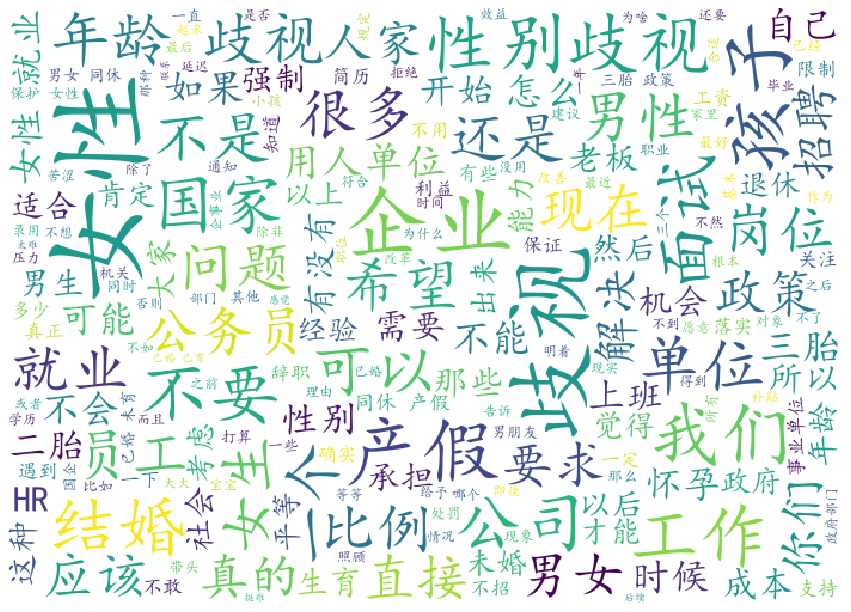

In [9]:
wc = WordCloud(font_path=font_path,  # ËÆæÁΩÆÂ≠ó‰Ωì

              background_color="white",  # ËÉåÊôØÈ¢úËâ≤

              max_words=200,  # ËØç‰∫ëÊòæÁ§∫ÁöÑÊúÄÂ§ßËØçÊï∞

              stopwords = stopwords,        # ËÆæÁΩÆÂÅúÁî®ËØç

              max_font_size=100,  # Â≠ó‰ΩìÊúÄÂ§ßÂÄº

              width=700, 
               
               height=500,
               
               margin=2,# ËÆæÁΩÆÂõæÁâáÈªòËÆ§ÁöÑÂ§ßÂ∞è,margin‰∏∫ËØçËØ≠ËæπÁºòË∑ùÁ¶ª

              ).generate(wordlist)

plt.figure(figsize=[15,12])

plt.imshow(wc)

plt.axis("off")

plt.savefig("2/all_comment.jpg")#ÂøÖÈ°ªÂú®plt.show‰πãÂâçÔºå‰∏çÊòØÂõæÁâáÁ©∫ÁôΩ

plt.show()

## 3„ÄÅËØÑËÆ∫‰∫∫ÂàÜÊûê

In [10]:
data.sort_values(by='floor',ascending=False)

commenter gender                                               text  floor
297      Ë•øÊôÆÂÆù-      f  Èù¢ÂØπ25-30Â≤ÅÁöÑÈùíÂπ¥Â•≥ÊÄßÔºåÈù¢ËØïÂÆòÁÖßÊ†∑‰ºöÈóÆ‰Ω†ÁªìÊ≤°ÁªìÂ©öÔºåÊúâÊ≤°ÊúâÁî∑ÂèãÔºåÁªì‰∫ÜÂ©ö‰πü‰ºöÈóÆ‰Ω†ÊúâÊ≤°ÊúâÂ∞èÂ≠©Ôºå...   8066
212   ÈòøËç£Âíå‰ªñÁöÑËÄÅÂÖ¨      m            ‰ºÅ‰∏öÊúâËá™‰∏ªÈÄâÊã©ÊùÉ,‰ºÅ‰∏ö‰∏çÊÉ≥Áî®Â•≥ÊÄßËÅåÂ∑•‰Ω†‰πü‰∏çËÉΩÂº∫Ëø´,ÂΩìÁÑ∂ËøôÂ∫îËØ•Âú®ÊãõËÅò‰πãÂâçÊèêÂâçËØ¥Êòé   8057
213   ÁéãË¥ùËØ≠ÁöÑÂòéÊãâÂìà      f  Ë∂äÂêµÂêµÁé∞ÂÆûË∂äÁ≥üÁ≥ïÔºåÂõΩ‰ºÅ‰∏ç‰∫ÜËß£ÔºåÁßÅ‰ºÅÂ∞±ÊòØÁúãËÉΩÂäõ‰ª∑ÂÄºÊïàÁõäÔºåÁîüÂ≠©Â≠êËÄΩËØØÊó∂Èó¥ÂíåÂèëÂ±ïÔºåËøòÊòØÂæó‰ªéÂÆ∂ÈáåÊâæË°•...   8029
214      ÊÄÇÂÖÆÂÖÆÂëÄ      f                                       ‰∏çÁî®ÊâìÂºÄÈÉΩÁü•ÈÅìÊ≠ßËßÜÈÇ£ÈÉ®ÂàÜ   8015
215     Âº†Âº†Âº†ÊòéÁôΩ      f                           Êàë‰ª¨ÂÖ¨Âè∏ÔºåÁîüÊ¥ªÂ≠©Â≠êÁöÑÂ•≥ÊÄßÈÉΩË¢´ËÆ§‰∏∫Á®≥ÂÆöÔºåÂä†Â∑•ËµÑ‰πüÂ§ö   8008
..        ...    ...                                                ...    ...
0     MissXÂÖîÂÖî      m                           ‰∫∫ÂÆ∂‰πü‰∏çËØ¥‰∏çË¶ÅÂ•≥ÁöÑÂëÄ„ÄÇÂ∞±ËØ¥‰Ω†‰∏çÁ¨¶ÂêàÊù°‰ª∂Ôºå‰Ω†ÊÄé‰πàÂäû      5
125        Á≤ëÂ©ä      m                                            Â∏åÊúõËÉΩÁúüÊ≠£ËêΩÂÆû      4
29       ÈùûÈõ®ÊôìÈπ§      m                                            Â∏åÊúõËêΩÂÆûÂà∞‰Ωç„ÄÇ      3
211     ÁéãÊäë‰∫ëÂÖàÁîü      m                                        ÂØπ‰∏çËµ∑Êàë‰ª¨‰∏çÊãõÂ•≥ÁöÑÂòøÂòø      2
41    Âú£ÊØçÁôΩËé≤Ëä±ÂÖ¨‰∏ª      f                                        ÂØπ‰∏çËµ∑Êàë‰ª¨‰∏çÊãõÂ•≥ÁöÑÂòøÂòø      1

[298 rows x 4 columns]

### 3.1ÁÉ≠ËØÑÂàÜÊûê

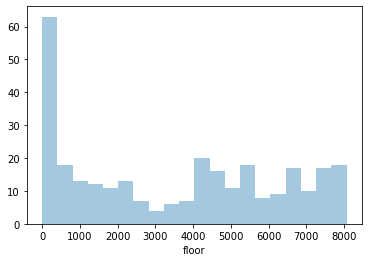

In [11]:
sns.distplot(data['floor'],bins=20,kde=False)

In [12]:
hot_comment = data[data['floor'].apply(lambda x: x > 7500)]

In [13]:
hot_comment

commenter gender                                               text  \
105          Á¨¶ÊúµÊãâ      f                                ‰∏ç‰ªéÂ∞±‰∏öËß£ÂÜ≥ÈóÆÈ¢òÔºå‰∏âËÉéÊîøÁ≠ñÊ†πÊú¨‰∏çÁé∞ÂÆû„ÄÇ   
162        Ê£ïÁ†ºQAQ      m  ÊúâÁöÑ‰∏ì‰∏öÁ°ÆÂÆûÂ•≥ÊÄß‰∏çÈÄÇÂêàÔºåÊØîÂ¶ÇÈáç‰ΩìÂäõÂä≥Âä®Ôºå‰Ω†ËØ¥‰Ω†‰∏Ä‰∏™Â•≥ÁöÑÔºå‰Ω†ÈùûË¶ÅÂéªÔºå‰Ω†Âéª‰∫ÜËÉΩÂπ≤Âï•ÔºåÂπ≤Ê¥ªËÇØÂÆö‰∏çÂ¶Ç...   
163        ËúóÁâõÁâµÁùÄÁå™      m  ÊÄßÂà´Ê≠ßËßÜËÉåÂêéÊòØÂπ¥ÈæÑÊ≠ßËßÜÔºåÂçïÁ∫ØÁöÑÊÄßÂà´Ê≠ßËßÜÊòØÈùûÂ∏∏Â∞ëÁöÑÔºåÂ§ßÂ§öÊï∞Ë¢´Ê≠ßËßÜÁöÑÂ•≥ÊÄßÈÉΩÊòØËøá‰∫Ü30Â≤ÅÔºåÂ∞§ÂÖ∂ÊòØËøá...   
164        ËúóÁâõÁâµÁùÄÁå™      m  Êúâ‰∫õÊ≠ßËßÜÊòØÂõΩÂÆ∂Â∏¶Â§¥ÁöÑÔºåÊØîÂ¶ÇÂÖ¨ËÄÉ35Â≤ÅÈôêÂà∂ÔºåÂΩìÁÑ∂ÔºåÂõΩÂÆ∂Êú¨ÊÑè‰∏çÊòØÊ≠ßËßÜÔºå‰ΩÜÊòØ‰º†ÂØºÂà∞Á§æ‰ºöÔºåÂ∞±ÂΩ¢Êàê‰∫Ü3...   
165        ËúóÁâõÁâµÁùÄÁå™      m  ÊØîËµ∑ÈöêÊÄßÁöÑÊÄßÂà´Ê≠ßËßÜÔºåÊòéÁõÆÂº†ËÉÜÁöÑÂπ¥ÈæÑÊ≠ßËßÜÊõ¥Â∫îËØ•ÈáçËßÜ„ÄÇ‰∏≠ÂõΩÁöÑÂπ¥ÈæÑÊ≠ßËßÜ‰∏çÊòØ40Â≤Å‰∏çÊòØ45Â≤Å‰∏çÊòØ50...   
166  Â≠¶‰∏çÊ≠ªÂ∞±ÂæÄÊ≠ªÈáåÂ≠¶ÂïäÂñµÂëú      f                Â∞±Â∫îËØ•Áî∑Â•≥ÈÉΩÂº∫Âà∂‰ºë‰∫ßÂÅáÔºåÂ•≥Áîü‰ºëÂÆå‰∏äÁè≠Áî∑ÁîüÂºÄÂßã‰ºëÂ∏¶Â®ÉÔºåËøôÊ†∑Â∞±Ë∞Å‰πü‰∏çÊ≠ßËßÜ‰∫Ü   
167   Mon-666666      f                                 Êàë‰ª¨ÂÖ¨Âè∏Ë¶ÅÊ±ÇÂ•≥ÊÄßÂÖ•ËÅå‰∏ÄÂπ¥ÂÜÖ‰∏çËÉΩÊÄÄÂ≠ïÂë¢   
212      ÈòøËç£Âíå‰ªñÁöÑËÄÅÂÖ¨      m            ‰ºÅ‰∏öÊúâËá™‰∏ªÈÄâÊã©ÊùÉ,‰ºÅ‰∏ö‰∏çÊÉ≥Áî®Â•≥ÊÄßËÅåÂ∑•‰Ω†‰πü‰∏çËÉΩÂº∫Ëø´,ÂΩìÁÑ∂ËøôÂ∫îËØ•Âú®ÊãõËÅò‰πãÂâçÊèêÂâçËØ¥Êòé   
213      ÁéãË¥ùËØ≠ÁöÑÂòéÊãâÂìà      f  Ë∂äÂêµÂêµÁé∞ÂÆûË∂äÁ≥üÁ≥ïÔºåÂõΩ‰ºÅ‰∏ç‰∫ÜËß£ÔºåÁßÅ‰ºÅÂ∞±ÊòØÁúãËÉΩÂäõ‰ª∑ÂÄºÊïàÁõäÔºåÁîüÂ≠©Â≠êËÄΩËØØÊó∂Èó¥ÂíåÂèëÂ±ïÔºåËøòÊòØÂæó‰ªéÂÆ∂ÈáåÊâæË°•...   
214         ÊÄÇÂÖÆÂÖÆÂëÄ      f                                       ‰∏çÁî®ÊâìÂºÄÈÉΩÁü•ÈÅìÊ≠ßËßÜÈÇ£ÈÉ®ÂàÜ   
215        Âº†Âº†Âº†ÊòéÁôΩ      f                           Êàë‰ª¨ÂÖ¨Âè∏ÔºåÁîüÊ¥ªÂ≠©Â≠êÁöÑÂ•≥ÊÄßÈÉΩË¢´ËÆ§‰∏∫Á®≥ÂÆöÔºåÂä†Â∑•ËµÑ‰πüÂ§ö   
216      ËøòËøòËøòËøòËøòÊòØÊàë      f                                  Ë¶ÅËøô‰πàËØ¥ÁöÑËØùÔºåÊâÄÊúâÂçï‰ΩçÈÉΩÊ∂âÂèäÂà∞‰∫ÜÂêß   
217          ÁéÑÈÉΩ_      f                             ÂÇªÂ≠êÈÉΩÁü•ÈÅì‰∏çÊãõÂ•≥ÊÄßÊòØ‰∏∫‰ªÄ‰πàÔºå‰∏çÁîü‰∏âËÉéÊòØ‰∏∫‰ªÄ‰πà   
218          Ë¢ÅÂ∞èÂÆÖ      f                                  ÊúâÂï•Áî®Ôºü‰Ω†ËøòËÉΩÊû∂ÁùÄÂàÄËÆ©Áî®‰∫∫Âçï‰ΩçÁî®Ôºü   
219     Sawako__      f                               ‚ÄúÊúâÂØπË±°ÂêóÔºüËÉΩ‰øùËØÅ‰∏âÂπ¥‰ª•ÂÜÖ‰∏çÁîüÂ≠©Â≠êÂêóÔºü‚Äù   
220   Âê¥Â∫öÈúñÁöÑÂ∞èÂ∏É‰∏Å007      f  ÊàëÊòØÂÅöË£Ö‰øÆÁöÑÔºåÊúâÊó∂ÂÄôÂ§™ÂøôÊàë‰∏Ä‰∏™‰∫∫ÂéªÂ∑•Âú∞ÊµãÈáèÔºåÊúâÊ¨°ÊàëËøáÂéª‰∫∫ÂÆ∂Âõ†‰∏∫ÊàëÊòØ‰∏™Â•≥ÁöÑÁõ¥Êé•ËØ¥ÊàëÂ•≥ÁöÑËÇØÂÆö‰∏ç‰∏ì...   
221      ‰∏≠ÂõΩÊïôËÇ≤Êñ∞ÈóªÁΩë      m                                               ËΩ¨ÂèëÂæÆÂçö   
222      Á†ÅÂÜúÊµáÂú∞‰∏çÁî®Ê∞¥      f             Â∫îËØ•ËßÑÂÆöÁî®‰∫∫ÂÖ¨Âè∏Áî∑Â•≥ÊØî‰æãÔºåÁî∑ÊÄßÊØî‰æãÂ§ß‰∫éÊ≥ïÂÆöÊØî‰æãÂ∞±Â§ÑÁΩöÔºå‰∏çÁÑ∂ÂíãÂÆöÊúâÊ≤°ÊúâÂ´åÁñëÂïäÔºÅ   
223    ÈáëÊ∏êÂ±ÇÊòØÂù†ÂèØÁà±de      f           ‰∏≠Âª∫Ê†°ÊãõË¥¢Âä°ÂéªÂπ¥Âà∞Êàë‰ª¨Â≠¶Ê†°Êî∂‰∫ÜÂæàÂ§ö‰∫∫ÁöÑÁÆÄÂéÜ ÁªìÊûúÂêéÊù•Ë¶Å‰∫Ü‰∏§‰∏™Áî∑ÁîüÂ∞±Ë∑ëË∑Ø‰∫Ü[Ëã¶Ê∂©]   
224      Â¶ñÂàÄÁªù‰∏çÊòØÈùíÈìú      f    ‰∏çË¶ÅÂ•≥ÂëòÂ∑•‰∫∫ÂÆ∂ËøòËÉΩÁõ¥Êé•ËØ¥Â∞±Âõ†‰∏∫‰Ω†ÊòØÂ•≥ÁöÑÔºüËøòÊòØÂ∞ëÂÇ¨ÁîüÂêßÔºå‰∏á‰∏Ä‰Ω†‰ª•ÂêéÂÜçËÆ©Áîü4‰∏™5‰∏™‰ºÅ‰∏ö‰πüÁ°ÆÂÆû‰∏çÊÑøÊÑè   
297         Ë•øÊôÆÂÆù-      f  Èù¢ÂØπ25-30Â≤ÅÁöÑÈùíÂπ¥Â•≥ÊÄßÔºåÈù¢ËØïÂÆòÁÖßÊ†∑‰ºöÈóÆ‰Ω†ÁªìÊ≤°ÁªìÂ©öÔºåÊúâÊ≤°ÊúâÁî∑ÂèãÔºåÁªì‰∫ÜÂ©ö‰πü‰ºöÈóÆ‰Ω†ÊúâÊ≤°ÊúâÂ∞èÂ≠©Ôºå...   

     floor  
105   7971  
162   7829  
163   7803  
164   7770  
165   7732  
166   7721  
167   7606  
212   8057  
213   8029  
214   8015  
215   8008  
216   7993  
217   7981  
218   7917  
219   7916  
220   7879  
221   7819  
222   7682  
223   7602  
224   7553  
297   8066

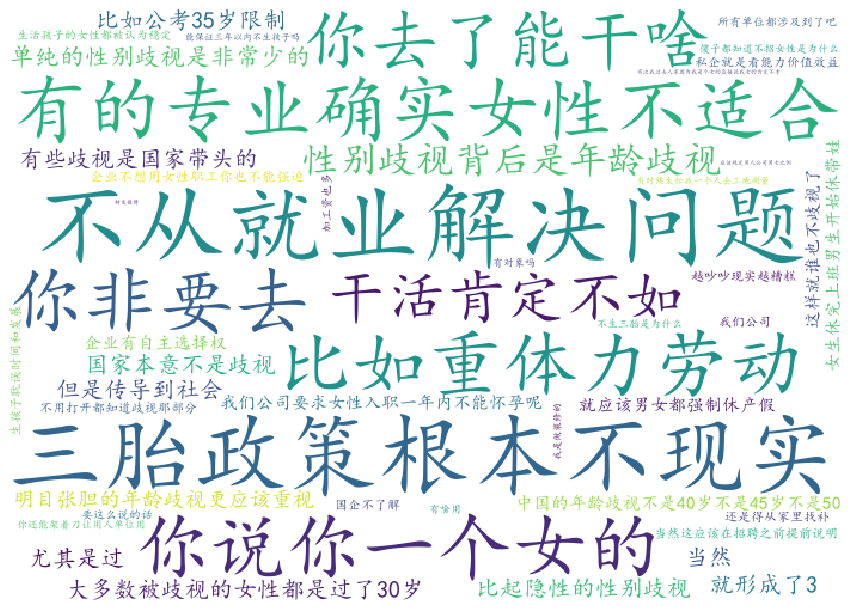

In [15]:
wordcloud=WordCloud(font_path="C:/Windows/Fonts/simkai.ttf",background_color='white',width=700,height=500,max_words=50).generate(str(hot_comment['text'])[:1825])
plt.figure(figsize=[15,12])
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("hot_comment(‰∏çÂàÜËØç).jpg")
plt.show()

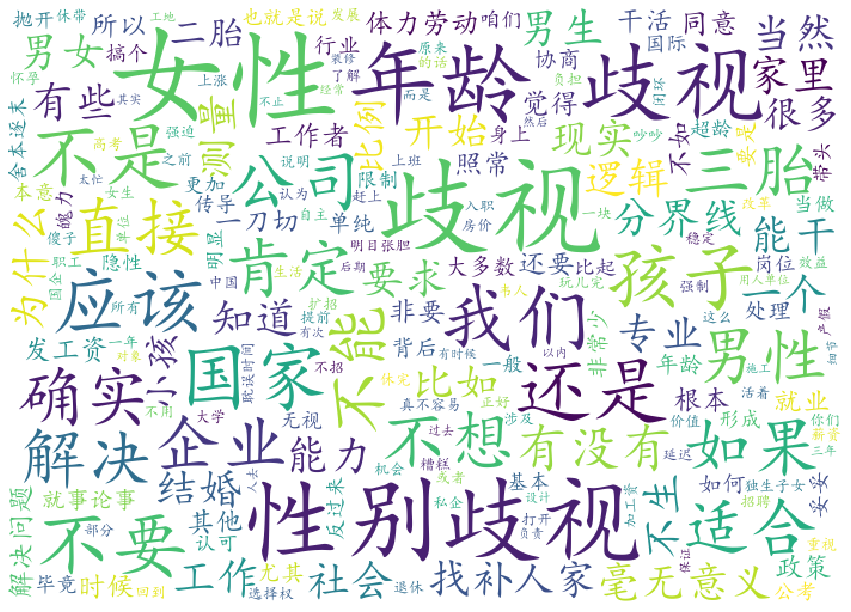

In [16]:
comment = hot_comment['text'].dropna(how='any') #ÂéªÊéâÁ©∫ÂÄº
text1 = ''.join(i for i in comment) #ÊääÊâÄÊúâÂ≠óÁ¨¶‰∏≤ËøûÊé•Êàê‰∏Ä‰∏™ÈïøÊñáÊú¨
word = re.sub(re.compile('Ôºå|Ôºõ|\.|„ÄÅ|„ÄÇ'),'',text1) #ÂéªÊéâÈÄóÂè∑Á≠âÁ¨¶Âè∑
wordlist=" ".join(jieba.cut(word)) #ÂàÜËØçÂêéËøûÊé•
font_path=r'C:\Windows\Fonts\simkai.ttf'
stopwords = list(STOPWORDS)+['‰Ω†','‰∫Ü','Âë¢','Âïä','ÁöÑ','Ê≤°Êúâ','‰ΩÜÊòØ','Â∞±ÊòØ','Âõ†‰∏∫','ËøòÊúâ','Ëøô‰∏™','ÈÇ£‰∏™','ËøôÊ†∑','‰ªÄ‰πà']# ÂÅúÁî®ËØç
wc = WordCloud(font_path=font_path,  # ËÆæÁΩÆÂ≠ó‰Ωì

              background_color="white",  # ËÉåÊôØÈ¢úËâ≤

              max_words=200,  # ËØç‰∫ëÊòæÁ§∫ÁöÑÊúÄÂ§ßËØçÊï∞

              stopwords = stopwords,        # ËÆæÁΩÆÂÅúÁî®ËØç

              max_font_size=100,  # Â≠ó‰ΩìÊúÄÂ§ßÂÄº

              random_state=42,#ËÆæÁΩÆÊúâÂ§öÂ∞ëÁßçÈöèÊú∫ÁîüÊàêÁä∂ÊÄÅÔºåÂç≥ÊúâÂ§öÂ∞ëÁßçÈÖçËâ≤

              width=700, 
               
               height=500,
               
               margin=2,# ËÆæÁΩÆÂõæÁâáÈªòËÆ§ÁöÑÂ§ßÂ∞è,margin‰∏∫ËØçËØ≠ËæπÁºòË∑ùÁ¶ª

              ).generate(wordlist)

plt.figure(figsize=[15,12])

plt.imshow(wc)

plt.axis("off")

plt.savefig("hot_comment.jpg")#ÂøÖÈ°ªÂú®plt.show‰πãÂâçÔºå‰∏çÊòØÂõæÁâáÁ©∫ÁôΩ

plt.show()

### 3.2ËØÑËÆ∫‰∫∫ÊÄßÂà´ÂàÜÊûê

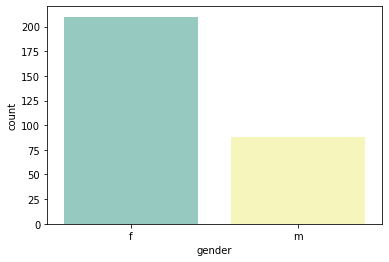

In [17]:
sns.countplot(data=data,x="gender",order=['f', 'm'], palette="Set3");

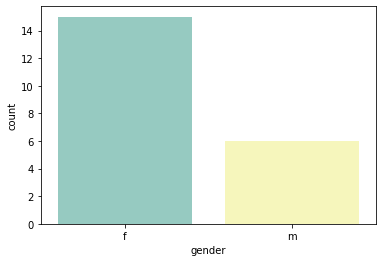

In [18]:
sns.countplot(data=hot_comment,x="gender",order=['f', 'm'],palette="Set3");

### 3.3Áî∑ÊÄßËØÑËÆ∫

In [19]:
male_comment = data[data['gender'].apply(lambda x: x =="m")]
male_comment.head()

commenter gender                                              text  floor
0    MissXÂÖîÂÖî      m                          ‰∫∫ÂÆ∂‰πü‰∏çËØ¥‰∏çË¶ÅÂ•≥ÁöÑÂëÄ„ÄÇÂ∞±ËØ¥‰Ω†‰∏çÁ¨¶ÂêàÊù°‰ª∂Ôºå‰Ω†ÊÄé‰πàÂäû      5
3      ÁùπÂ∞îÂøÜÊô¥Ê±ü      m                                ÂèØ‰ª•Áî∑Â•≥Âêå‰øÆ‰∫ßÂÅáÂêóÔºüËÉΩËß£ÂÜ≥ÂæàÂ§öÊ≠ßËßÜ‰∫Ü    119
9      ‰∏ì‰∏öÁ¢éÊª§Èïú      m                         ‰Ω†‰ª¨ÊòØÁúüÂÇªËøòÊòØË£ÖÂÇªÔºüÂ∞±Âñä‰∏ãÂè£Âè∑‰Ω†ËßâÂæó‰Ω†ËÉΩÊï∑Ë°çË∞ÅÂïäÔºü     75
11      ‰∏áÁâ©ÂåñÈæç      m  ÊîøÂ∫úÊääÂÆòÂëòÁöÑ‰ªªÁî®ÊØî‰æãÊèêÈ´òÂà∞50%‰ª•‰∏äÔºåÁî®‰∫∫Âçï‰Ωç‰πü‰∏ç‰ºöÊ≠ßËßÜÂ•≥ÊÄßÂï¶ÔºÅÊîøÂ∫úÈÉΩ‰∏ç‰Ωú‰∏∫Ôºå‰Ω†Âá≠‰ªÄ‰πàË¶ÅÊ±Ç‰ºÅ‰∏öÔºü     59
12       ÊòØË®ÄËæû      m                                  ‰∫∫ÂÆ∂ËÇØÂÆö‰∏ç‰ºöÁõ¥ËØ¥‰Ω†ÊòØÂ•≥Áîü‰∏çË¶Å‰Ω†Âïä     12

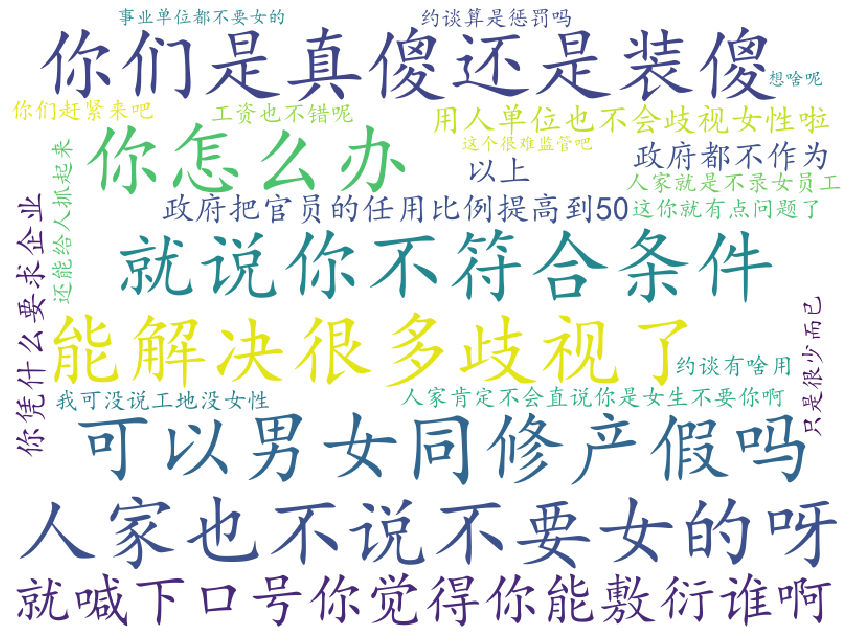

In [20]:
wordcloud=WordCloud(font_path="C:/Windows/Fonts/simkai.ttf",background_color='white',width=800,height=600,max_words=50).generate(str(male_comment['text'])[:615])
plt.figure(figsize=[15,12])
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("male_comment(‰∏çÂàÜËØç).jpg")
plt.show()

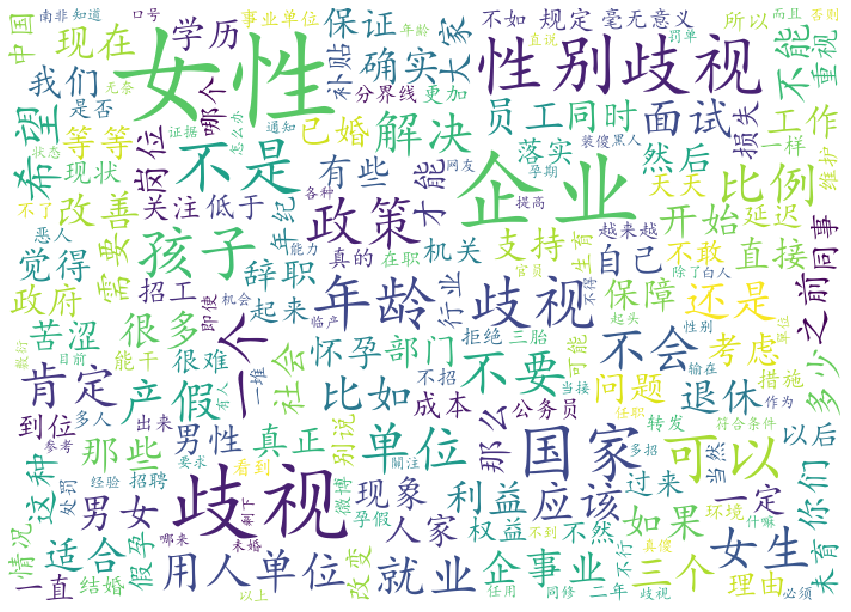

In [21]:
comment = male_comment['text'].dropna(how='any') #ÂéªÊéâÁ©∫ÂÄº
text1 = ''.join(i for i in comment) #ÊääÊâÄÊúâÂ≠óÁ¨¶‰∏≤ËøûÊé•Êàê‰∏Ä‰∏™ÈïøÊñáÊú¨
word = re.sub(re.compile('Ôºå|Ôºõ|\.|„ÄÅ|„ÄÇ'),'',text1) #ÂéªÊéâÈÄóÂè∑Á≠âÁ¨¶Âè∑
wordlist=" ".join(jieba.cut(word)) #ÂàÜËØçÂêéËøûÊé•
font_path=r'C:\Windows\Fonts\simkai.ttf'
stopwords = list(STOPWORDS)+['‰Ω†','‰∫Ü','Âë¢','Âïä','ÁöÑ','Ê≤°Êúâ','‰ΩÜÊòØ','Â∞±ÊòØ','Âõ†‰∏∫','ËøòÊúâ','Ëøô‰∏™','ÈÇ£‰∏™','ËøôÊ†∑','‰ªÄ‰πà']# ÂÅúÁî®ËØç
wc = WordCloud(font_path=font_path,  # ËÆæÁΩÆÂ≠ó‰Ωì

              background_color="white",  # ËÉåÊôØÈ¢úËâ≤

              max_words=200,  # ËØç‰∫ëÊòæÁ§∫ÁöÑÊúÄÂ§ßËØçÊï∞

              stopwords = stopwords,        # ËÆæÁΩÆÂÅúÁî®ËØç

              max_font_size=100,  # Â≠ó‰ΩìÊúÄÂ§ßÂÄº

              random_state=42,#ËÆæÁΩÆÊúâÂ§öÂ∞ëÁßçÈöèÊú∫ÁîüÊàêÁä∂ÊÄÅÔºåÂç≥ÊúâÂ§öÂ∞ëÁßçÈÖçËâ≤

              width=700, 
               
               height=500,
               
               margin=2,# ËÆæÁΩÆÂõæÁâáÈªòËÆ§ÁöÑÂ§ßÂ∞è,margin‰∏∫ËØçËØ≠ËæπÁºòË∑ùÁ¶ª

              ).generate(wordlist)

plt.figure(figsize=[15,12])
plt.imshow(wc)

plt.axis("off")

plt.savefig("male_comment.jpg")#ÂøÖÈ°ªÂú®plt.show‰πãÂâçÔºå‰∏çÊòØÂõæÁâáÁ©∫ÁôΩ

plt.show()

### 3.4Â•≥ÊÄßËØÑËÆ∫

In [22]:
female_comment = data[data['gender'].apply(lambda x: x =="f")]
female_comment.head()

commenter gender                                               text  \
1             ÊØèÊó•ÁæéÂ•Ω      f                    ÊÑüËßâÊå∫ÈöæÁöÑ‚Ä¶Áé∞Âú®ÂæàÂ§ö‰ºÅ‰∏öÂ∞±ÊòØ‰∏çÊòéËØ¥Ôºå‰ΩÜÂ∞±‰ºöÁî®ÂêÑÁßçÁêÜÁî±ÊääÂ•≥ÁöÑÂà∑Êéâ   
2          cpÁ£ïÂà∞Â§¥Êé∞Êéâ      f  „ÄÇ„ÄÇËøôÂæàÈöæÔºåÈô§ÈùûÊúâÊîøÁ≠ñÔºåË¶ÅÊ±Ç‰ºÅ‰∏öÂ•≥ÂëòÂ∑•ÊØî‰æãÂ§öÂ∞ëÔºåÊàñËÄÖÂ•≥ÂëòÂ∑•Â§öÊúâ‰∏ÄÂÆöÁ®éÂä°ÊîøÁ≠ñ‰ºòÊÉ†„ÄÇ„ÄÇÊâçËÉΩÁúüÁöÑ‰øù...   
4             Âè∏È©¨ËíÇËçß      f  ‰∏âËÉéÊîøÁ≠ñ‰∏ÄÂá∫ÔºåÊúâÂá†‰∏™‰ºÅ‰∏ö‰ºöÊòéËØ¥‰∏çË¶ÅÂ•≥ÊÄßÔºü‚ÄúÊñπ‰æøÈóÆÊÇ®Áé∞Âú®ÁöÑÂ©öÂßªÊÉÖÂÜµÂêóÔºü‚Äù‚ÄúÂõ†‰∏∫ËøòÊúâÂÖ∂‰ªñÂÄôÈÄâ‰∫∫ÈúÄ...   
5  lazybabycatssss      f                                         ÂæàÂ§öÈÉΩÊòØÈöêÊÄßÊÄßÂà´Ê≠ßËßÜ   
6           ‰πà‰πà‰πàsss      f  Â•≥ÊÄßÂæàÂ§öÈÉΩÊòØÈöêÂΩ¢ÊÄßÂà´Ê≠ßËßÜÔºåÊàë‰ª¨ÂéªÂ∫îËÅòÈÉΩË¶ÅÈóÆÊÅãÁà±ÊÉÖÂÜµÂíåÂáÜÂ§á‰ªÄ‰πàÊó∂ÂÄôÁªìÂ©öË¶ÅÂ≠©Â≠êÁî∑Áîü‰∏ç‰ºöÈóÆ„ÄÇÈïøËÉñ‰∫Ü...   

   floor  
1     17  
2      7  
4     31  
5      9  
6   1095

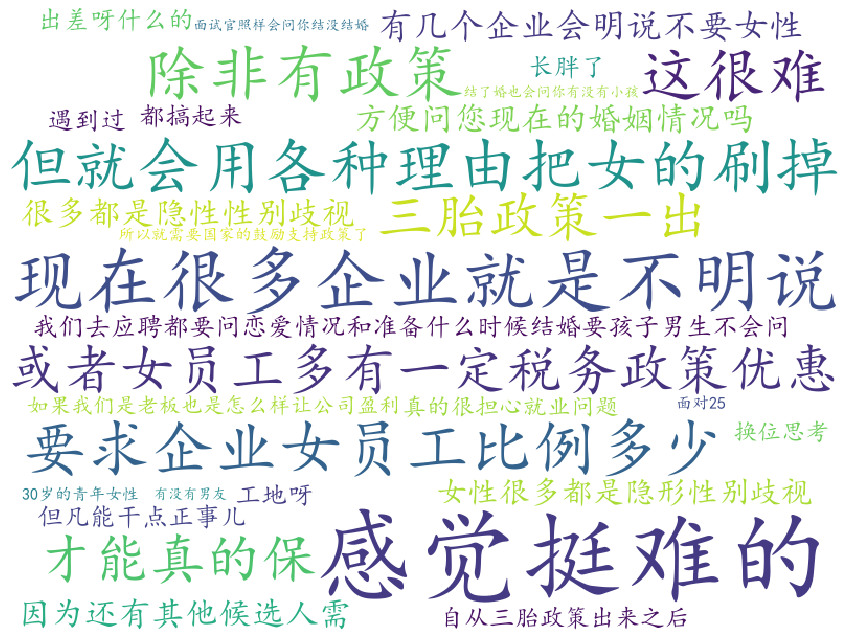

In [23]:
wordcloud=WordCloud(font_path="C:/Windows/Fonts/simkai.ttf",background_color='white',width=800,height=600,max_words=50).generate(str(female_comment['text'])[:628])
plt.figure(figsize=[15,12])
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("female_comment(‰∏çÂàÜËØç).jpg")
plt.show()